In [ ]:
'''
决策树 概述

决策树（Decision Tree）算法是一种基本的分类与回归方法，是最经常使用的数据挖掘算法之一。我们这章节只讨论用于分类的决策树。
决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是 if-then 规则的集合，也可以认为是定义
在特征空间与类空间上的条件概率分布。

决策树学习通常包括 3 个步骤：特征选择、决策树的生成和决策树的修剪。
'''

In [ ]:
'''
机器学习实战：自学总结，
1.github AI社区的例子
缺点：都是书中精简过的，部分内容的承前启后省略了，代码虽然有注释，但是部分注释含糊不清，甚至有错误，误导的地方。视频讲解的也不清楚——例如 决策树中的 划分数据集函数部分，特征一会说成属性，一会又说成特征，不统一。另外这部分本身就比较模糊，书本中描述的也是模糊不清。——最好结合代码，在机器上进行跑一遍，对着中间输出过程结果，结合书本的承前启后的内容进行仔细过一遍。
优点：但是代码都有注释。

2.课本：
缺点：代码解释不清晰，没有每行解释，导致一些关键行代码不清原理
代码是将理论落地的实践过程，是代码工程的具体实践体现，如果理解不透，则不能很好地理解，理论如何转化实践过程
有点：内容比较连贯，承前启后，有一些补充说明

3.个人体会：
在python代码实现算法的过程中，一是要明确各个算法的 
1.输入参数：参数意义、参数数据格式
2.输出返回值：返回值意义，返回值数据格式
3.对于代码不理解的，上机查看中间过程输出结果，对比代码、书理论、运行结果理解，有时候运行结果非常直观，一下子就明白了书中很多段模糊的话所描述的意思
4.特别是参数的用语：社区例子和书中都没有很好的统一用语，容易导致读者混乱

    标签：不明语义下有以下情况

    训练数据集：是一个矩阵，每一行是一个实例，每一行的数据组成是 前几列为   
              特征值，最后一列数据为类别标签
    特征标签：训练数据集的特征列，直接输入的是特征值，并没有标题，即没有
            特征名称说明，特征标签就是单独将特征名称按照从左到右的顺序  
            取出来，组成一个list
    类标签：指的是数据集的类别标签值，即最后一列类别的各种取值

    字典特殊的键值对结构
    键：key，描述用语统一用键数据、键信息
    值：value，描述用语统一用值数据、值信息
    例如直接来一个键值：在文中就很模糊，需要根据上下文，到底是键数据，还是键数据对应的值数据。

5. 构建决策树的过程中，会对特征名称列表进行逐步的特征名删除
在构建完成决策树进行测试的时候，要对特征名称列表重新生成

6.对于模型需要的数据结构和格式，每个方法也有特别的要求，这个需要结合具体的代码和运行结果进行观察，
因为针对不同的数据格式list of list，还是矩阵，还是矩阵的一行实例，都需要不同的数据格式处理方式，
表现在代码的处理上也不一样
'''

In [ ]:
'''
决策树的定义：

分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点（node）和有向边（directed edge）组成。
结点有两种类型：内部结点（internal node）和叶结点（leaf node）。内部结点表示一个特征或属性(features)，
叶结点表示一个类(labels)。

用决策树对需要测试的实例进行分类：从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子结点；
这时，每一个子结点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶结点。最后将实例分配到叶结点的类中。
'''

In [ ]:
'''
决策树 须知概念
信息熵 & 信息增益

熵（entropy）： 熵指的是体系的混乱的程度，在不同的学科中也有引申出的更为具体的定义，是各领域十分重要的参量。

信息论（information theory）中的熵（香农熵）： 是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值很低，相反，熵值很高。

信息增益（information gain）： 在划分数据集前后信息熵发生的变化称为信息增益。

决策树 工作原理
如何构造一个决策树?
我们使用 createBranch() 方法，如下所示：

def createBranch():

    # 此处运用了迭代的思想。 感兴趣可以搜索 迭代 recursion， 甚至是 dynamic programing。

    检测数据集中的所有数据的分类标签是否相同:
        If so return 类标签
        Else:
            寻找划分数据集的最好特征（划分之后信息熵最小，也就是信息增益最大的特征）
            划分数据集
            创建分支节点
                for 每个划分的子集
                    调用函数 createBranch （创建分支的函数）并增加返回结果到分支节点中
            return 分支节点
            
决策树 开发流程

收集数据：可以使用任何方法。
准备数据：树构造算法 (这里使用的是ID3算法，只适用于标称型数据，这就是为什么数值型数据必须离散化。 还有其他的树构造算法，比如CART)
分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。
训练算法：构造树的数据结构。
测试算法：使用训练好的树计算错误率。
使用算法：此步骤可以适用于任何监督学习任务，而使用决策树可以更好地理解数据的内在含义。
决策树 算法特点
优点：计算复杂度不高，输出结果易于理解，数据有缺失也能跑，可以处理不相关特征。
缺点：容易过拟合。
适用数据类型：数值型和标称型。
'''

In [ ]:
'''
项目案例1: 判定鱼类和非鱼类
项目概述
根据以下 2 个特征，将动物分成两类：鱼类和非鱼类。

特征：
不浮出水面是否可以生存
是否有脚蹼

开发流程
完整代码地址: https://github.com/apachecn/AiLearning/blob/master/src/py2.x/ml/3.DecisionTree/DecisionTree.py

收集数据：可以使用任何方法
准备数据：树构造算法（这里使用的是ID3算法，因此数值型数据必须离散化。）
分析数据：可以使用任何方法，构造树完成之后，我们可以将树画出来。
训练算法：构造树结构
测试算法：使用习得的决策树执行分类
使用算法：此步骤可以适用于任何监督学习任务，而使用决策树可以更好地理解数据的内在含义
'''

In [51]:
'''
1. 我们利用 createDataSet() 函数输入数据
'''
def createDataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [ ]:
'''
2.准备数据：树构造算法
此处，由于我们输入的数据本身就是离散化数据，所以这一步就省略了。
3.分析数据：可以使用任何方法，构造树完成之后，我们可以将树画出来。
'''


In [ ]:
'''
补充：用字典(key,value)的形式，来推某一类型进行统计
'''
# 机器学习实战 写法：
# 遇到一个新的键数据，键数据没有出现在字典结构中，需要在字典中新建键值对
if currentLabel not in labelCounts.keys():
    labelCounts[currentLabel] = 0
# 使用一个字典类型labelCounts={}，统计各实例的类别标签出现的次数
labelCounts[currentLabel] += 1

# python语言程序设计基础 嵩天写法：
if currentLabel in labelCounts:
    labelCounts[currentLabel] = labelCounts[currentLabel] + 1
else:
    labelCounts[currentLabel] = 1
    
# 简写法：.get(key,default)键信息存在则返回相应值信息，否则返回默认值
labelCounts[currentLabel] = labelCounts.get(currentLabel,0) + 1


In [9]:
'''
4.计算给定数据集的香农熵的函数:
  度量数据集的无序程度，混合类型数据越多，熵值越大
'''
from math import log

def calcShannonEnt(dataSet):
    #求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    #通过字典，来统计某一个类的数量：计算分类标签label出现的次数
    labelCounts = {}
    #
    for featVec in dataSet:
        # 将当前实例的类别标签存储，即每一行数据的最后一个数据代表的是标签，即类别标签是否为鱼：yes、no
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键数据不存在，则扩展字典并将当前键数据加入字典。
        # 每个键值都记录了当前类别出现的次数。
        # 键对应当前的类别，值对应当前类别出现的次数
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    
    '''
    简写法：.get(key,default)键信息存在则返回相应值信息，否则返回默认值
    labelCounts[currentLabel] = labelCounts.get(currentLabel,0) + 1
    '''
        
        
    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    # 字典中键值对的键数据，相当于for循环的索引值key
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率
        prob = float(labelCounts[key])/numEntries
        # 计算香农熵，以2为底求对数
        shannonEnt -= prob * log(prob,2)
    return shannonEnt
        

In [55]:
# 测试原始数据集的熵值
myDat,labels = createDataSet()
print(myDat)
print(labels)
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


0.9709505944546686

In [13]:
# 对原始数据集增加分类，观察熵值变大
myDat[0][-1]='maybe'
print(myDat)
calcShannonEnt(myDat)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


1.3709505944546687

In [16]:
'''
5.按照给定特征划分数据集：

分类算法：

1.需要测量数据集信息熵
2.需要划分数据集
3.度量划分数据集的熵
4.判断当前划分是否正确

对每个特征划分数据集的结果计算一次信息熵，然后判断按照那个特征划分数据集是最好的划分方式。
'''

'''
按照某个特征划分数据集，将所有符合该特征值的元素抽取出来：
1.指定哪个特征 参数index
2.指定该特征的值 参数value

splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
  就是依据index列进行分类，如果index列的数据等于value的时候，就要将 index 划分
  到我们创建的新的数据集中

参数：
1.dataSet：待划分的数据集，为一个矩阵，每一行为一个实例。
2.index：划分数据集的特征,指定按照数据集第几个特征划分。表示每一行实例的index特征列，即每一行的特征列,
         每一行有若干个特征列，index指定选取第几个特征列。
3.value：指定数据集第几个特征所对应的特征值。需要返回的特征值,表示每一行实例，指定选取的第index个特征列所对应的value值

返回值：
  返回，取第index个特征列中，特征值为value的数据集【该数据集需要排除index列】
  该数据集需要排除第index个特征列，即返回的数据集要把这个用来指定划分的特征列去掉
'''
def splitDataSet(dataSet,index,value):
    retDataSet = []
    # 取出数据集矩阵中的每一行，即为一个实例
    for featVec in dataSet:
        # 判断index列的值是否为value
        if featVec[index] == value:
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reduceFeatVec = featVec[:index]            
            # 用extend来拼接每行的特征列数据，跳过指定的第index个特征列，继续拼接后续列，形成新的一行实例数据
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            reduceFeatVec.extend(featVec[index+1:])
            # 用append来拼接每行的实例，形成list of list 格式的矩阵数据集
            # 数据集 ：所有第index个特征，特征值为value的矩阵的行，组成的数据集
            # 该数据集需要排除第index个特征列，即返回的数据集要把这个用来指定划分的特征列去掉
            retDataSet.append(reduceFeatVec)
    return retDataSet
            

In [ ]:
    dataSet = [[1,1,'maybe'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]

In [19]:
'''
文字描述不清的语义，解释：直接先运行一下结果，看返回值，就一目了然！！
'''
'''
splitDataSet方法测试
'''
# 在数据集样本上测试splitDataSet()函数
print(myDat)
# 返回，第1个特征值（从0开始），值为1的所有实例，即矩阵的行
splitDataSet(myDat,1,1)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


[[1, 'maybe'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [22]:
# 返回，第0个特征值，值为1的所有实例，即矩阵的行
# 第index=0个特征列，特征值为value=1的数据集
#【该数据集需要排除第index=0个特征列，所以只剩下两列的数据】
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [ ]:
 '''
    请百度查询一下： extend和append的区别
    list.append(object) 向列表中添加一个对象object
    list.extend(sequence) 把一个序列seq的内容添加到列表中
    1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
    2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
    result = []
    result.extend([1,2,3])
    print result
    result.append([4,5,6])
    print result
    result.extend([7,8,9])
    print result
    结果：
    [1, 2, 3]
    [1, 2, 3, [4, 5, 6]]
    [1, 2, 3, [4, 5, 6], 7, 8, 9]
'''

In [27]:
'''
6. 选择最好的数据集划分方式：
   1.遍历整个数据集，循环计算熵和splitDataSet()函数，找到最好的特征划分方式。
   2.对每个特征划分数据集的结果计算一次信息熵，然后判断按照那个特征划分数据集是最好的划分方式。

参数：
    dataSet 数据集
返回值：
    bestFeature 最优的列特征
'''
def chooseBestFeatureToSplit(dataSet):
    '''
    此时dataSet需要满足一定的格式要求：
    1.数据集必须是矩阵list of list 格式
    2.每个list元素都要有相同的子list数据长度
    3.每一行实例的最后一个元素是实例的类别标签
    '''
    
    # 求数据集的第一行有多少个特征列，最后一列是类别标签列，所以减去1
    numFeatures = len(dataSet[0])-1
    # 数据集的原始信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值(默认0.0)，和最优的Feature编号(默认-1)
    bestInfoGain,bestFeature = 0.0,-1
    # 循环遍历每个特征
    for i in range(numFeatures):
        # 获取指定第i个特征，所对应的所有值
        '''
        取出dataSet矩阵数据集中，每一行实例的第i个特征的值，组成一个list
        '''
        featList = [example[i] for example in dataSet]
        # 获取去重后的集合，用set对list中的特征值数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        '''
        遍历某一指定的特征列的特征值value集合，计算该特征列的信息熵
        
        遍历第i个特征中所有唯一的特征值，对每一个唯一特征值划分一次数据集：唯一特征值，即表明第i个特征，
        到底取了几种数值
        
        计算数据集的新熵值：按照第i个特征的每种取值(例如：1,0)，会分别抽取出对应特征值0的数据集subDataSet0和
        对应特征值1的数据集subDataSet1，即形成两个新划分出来的子数据集叶子结点subDataSet0和subDataSet1
        
        并对所有唯一特征值得到的熵求和：这个即计算按照第i个特征划分数据集后，得到的结果总的信息熵值。
        因为划分了两个叶子结点，所以把两个叶子结点的熵值相加，得到总结果的熵值
        '''
        
        # 遍历第i个特征，所有的取值种类
        for value in uniqueVals:
            '''
            参数说明：
             dataSet：带划分的数据集
             i：指定第i个特征
             value：指定第i个特征的特征值
            返回值：
             subDataSet：返回，取第i个特征列，特征值为value的数据集
             该数据集需要排除第index个特征列，即返回的数据集要把这个用
             来指定划分的特征列去掉
            '''
            subDataSet = splitDataSet(dataSet,i,value)
            # 计算概率
            prob = len(subDataSet)/float(len(dataSet))
            '''
            1.calcShannonEnt(subDataSet)计算信息熵:计算第i个特征，在特征值=value情况下，划分数据集后的熵值
            2.并对所有唯一特征值得到的熵求和：这个即计算按照第i个特征划分数据集后，得到的结果总的信息熵值。
            3.把在特征值=每种value情况下，划分数据集后的熵值，进行求和。得到按照第i个特征划分数据集后，得到的结果总的信息熵值。
            4.注意，这里求和额外还增加了prob概率的乘积，再求和
            '''
            newEntropy += prob*calcShannonEnt(subDataSet)
        # gain信息增益：划分数据集前后信息熵的差值，获取信息熵差值最大的值
        # 信息增益是熵的减少或者是数据无序度的减少，比较所有特征中的信息增益，返回
        # 最好特征划分的索引值
        infoGain = baseEntropy - newEntropy
        print('infoGain=',infoGain,'bestFeature=',i,baseEntropy,newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
    


In [23]:
'''
chooseBestFeatureToSplit方法测试
'''
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [28]:
chooseBestFeatureToSplit(myDat)

infoGain= 0.41997309402197514 bestFeature= 0 1.3709505944546687 0.9509775004326936
infoGain= 0.17095059445466854 bestFeature= 1 1.3709505944546687 1.2000000000000002


0

In [47]:
'''
7. 递归的创建决策树
'''
''' 
第二个停止条件：使用完了所有特征，仍然不能讲数据集划分成仅包含唯一类别的分组：此时
即数据集只有1列,只有类别标签列。因为在‘选择数据集最好划分方式’的算法中，每次划分都
会减去指定的特征值，当所有特征值用过之后，即将数据集所有的特征值全部减去了，只剩下
类别标签列。

那么选出出现次数最多的分类名称，作为结果
'''
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        # 简写法：.get(key,default)键信息存在则返回相应值信息，否则返回默认值
        classCount[vote] = classCount.get(vote,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
    
    

def createTree(dataSet,labels):
    '''
    参数：
    dataSet 待划分的数据集
    labels 标签列表：数据集所有特征的标签,见书P36，即特征名称单独组成的list
    
    '''
    
    # 取出数据集dataSet矩阵，每一行的最后一个元素(即类别标签)，组成一个list
    # 即组成一个类别标签list
    classList = [example[-1] for example in dataSet]
    '''
    当数据集只有一个类别时：
    
    类别标签列表list的第0个元素的类别统计数量classList.count(classList[0])
    
    等于 
    
    类别标签list的长度len(classList)
    
    直接返回结果就好
    
    第一个停止条件：所有的类别标签完全相同，则直接返回该类别标签
    count() 函数是统计括号中的值在list中出现的次数
    '''
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    '''
    如果数据集只有1列,即只有类别标签列:len(dataSet[0]) == 1
    
    dataSet为list of list 的矩阵，dataSet[0]取得是第一行的子list，如果第一行的子list
    长度为1，说明数据集只有一个列：则通过投票表决算法，将出现次数最多的类别标签作为结果。
    
    第二个停止条件：使用完了所有特征，仍然不能讲数据集划分成仅包含唯一类别的分组：此时
    即数据集只有1列,只有类别标签列。因为在‘选择数据集最好划分方式’的算法中，每次划分都
    会减去指定的特征值，当所有特征值用过之后，即将数据集所有的特征值全部减去了，只剩下
    类别标签列。
    
    那么选出出现次数最多的分类名称，作为结果
    '''
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    # 选择最优的特征列，得到最优特征列对应的特征label含义(即获取最优特征列的特征名称)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    
    print(bestFeat)
    # 获取label的名称：即获取最优的特征的名称
    '''
        我们在处理数据之前，已经将特征名称单独列出来组成了一个特征名称的label列表：见书P36页
        labels[bestFeat]即得到对应bestFeat索引的特征的名称
    '''
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree，是一个嵌套字典的格式，得到当前最好的特征标签
    myTree = {bestFeatLabel:{}}
    # 注：labels列表是可变对象，在python语言中函数参数是列表类型时，参数
    # 是按照引用方式传递的，能够被全局修改
    # 所以这行代码会将函数外同名变量进行元素删除
    # 注意：如果反复执行这个代码，会出现函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 循环读取数据集dataSet每一行的实例，取得每一行实例的bestFeat特征对应的
    # 特征值，组成list
    featValues = [example[bestFeat] for example in dataSet]
    # 用set对list中的特征值数据进行去重
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 复制类别标签给subLabels。因为python语言中函数参数是列表类型时，
        # 参数是按照引用方式传递的。为了保证每次调用函数createTree()时
        # 不改变原始列表的内容，使用新变量subLabels替代原始列表
        '''
        得到当前剩余的特征标签，即剩余的特征名称list，因为前面del(labels[bestFeat])
        将已经当做最优特征用过的特征标签，已经从labels的特征名称list中去除了
        ''' 
        subLabels = labels[:]
        '''
        bestFeatLabel最优特征的名称,value最优特征所有的取值
        
        myTree = {beatFeatLabel:{}} 构建嵌套字典的格式: 
        内层{}又是一个键值对的形式：
        键数据：value最优特征的取值
        值数据: 类别标签，上方两个停止递归条件返回的类别标签
        
        '''
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    
    return myTree
    

In [59]:
#新建一个数据集和特征名称标签列
myDat,labels = createDataSet()
print(myDat)
print(labels)
# 通过训练集myDat构造myTree决策树模型
myTree = createTree(myDat,labels)
print(myTree)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [ ]:
'''
补充学习
labels的出处：

1. 我们利用 createDataSet() 函数输入数据
'''
def createDataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    '''
    将特征名称单独列出来组成了一个特征名称的label列表
    '''
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [2]:
'''
补充学习，通过字典嵌套来保存决策树的所有信息
在机器学习中会用字典的嵌套来存储决策树的信息，对绘制树形图有很大的作用，其中嵌套字典的生成是一个递归的过程 
如下所示：
'''
s={'no surfacing':{0:'no',1:{'flippers':{0: 'no', 1: 'yes'}}}}  # 构造字典
s['no surfacing'][0]

'no'

In [3]:
s['no surfacing'][1]

{'flippers': {0: 'no', 1: 'yes'}}

In [30]:
# 嵌套构造过程
s={'no sur':{}}   
s['no sur'][0]='no'
s['no sur']
s

{'no sur': {0: 'no'}}

In [32]:
'''
在上面构造嵌套字典的过程中，
1.可以通过key来得到相应的value，
2.而相应的value又可以是由字典构成的，
3.再次利用key作为索引层级得到value。

4.是嵌套构造的过程，可以看出ss虽然是一个嵌套的字典:{‘fli’: {0: ‘no’, 1: ‘yes’}}整体作为s字典中键数据1的值，
在机器学习实战中的创建树的过程中，用到了递归创建的方法.


'''
ss={'fli':{}}
ss['fli'][0]='no'
ss['fli'][1]='yes'
ss

{'fli': {0: 'no', 1: 'yes'}}

In [35]:
s['no sur'][1]=ss # 其中s是在递归中的最外层
s

{'no sur': {0: 'no', 1: {'fli': {0: 'no', 1: 'yes'}}}}

In [10]:
s['no sur'][1]

{'fli': {0: 'no', 1: 'yes'}}

In [74]:
'''
8.测试算法：使用决策树执行分类
将待测数据与决策树模型比对，输出类别结果的过程
'''
def classify(inputTree,featLabels,testVec):   
    '''
    参数：
        inputTree 决策树模型
        featLabels Feature特征标签对应的特征名称列表，
                          待测数据集testVec的特征名称列表，同训练数据集的特征名称列表
                          即，待测数据集的矩阵结构同训练数据集的矩阵结构，
                          每一行实例的特征名称列顺序一直，并且最后一个元素是类别标签
        testVec 待测数据，
                根据后续测试数据的输入，此时待测数据testVec为[1,0]是一个列表形式
                只能算是一个测试集矩阵的一行，而且去除了类别标签列。
                只保留特征列的一行数据，即一个只有特征列的实例


    返回值：
        classLabel 分类的结果值，需要映射label才能知道名称
        这里label是指：单独提取特征名称，组成的列表
    ''' 
    # 获取tree的根节点对应的key键数据,inputTree为一个嵌套字典形式
    # firstStr = inputTree.keys()[0].#python2的写法
    # python3写法：
    '''
    在2.7中，找到key所对应的第一个元素为：firstStr = myTree.keys()[0]，
    这在3.4中运行会报错：‘dict_keys‘ object does not support indexing，
    这是因为python3改变了dict.keys,返回的是dict_keys对象,支持iterable 但不支持indexable，
    我们可以将其明确的转化成list，则此项功能在3中应这样实现：
    firstSides = list(myTree.keys()) 
    firstStr = firstSides[0]#找到输入的第一个元素
    '''
    # 获取tree的根节点对应的key键数据,inputTree为一个嵌套字典形式
    firstStr = list(inputTree.keys())[0]
    # 通过key键数据得到根节点特征对应的value特征值数据,
    # 显然inputTree的决策树模型为一个嵌套字典格式，secondDict 仍然为一个嵌套字典形式，里面嵌套有键数据，也有值数据
    secondDict = inputTree[firstStr]
    # .index()获取索引值，即元素出现的位置：返回根节点的键数据，在特征名称列表中的索引号,即
    # 找到根节点对应的特征名称在特征名称列表中的位置
    featIndex = featLabels.index(firstStr)
#     # 在测试数据中，根据根节点对应的特征名称位置，找到对应输入的测试数据对应的特征名称
#     key = testVec[featIndex]
    '''
    featIndex 是 找到根节点对应的特征名称在特征名称列表中的位置索引
    待测数据集testVec的特征名称列表，该列表同 训练数据集的特征名称列表
    即，待测数据集的矩阵结构同训练数据集的矩阵结构，
    每一行实例的特征名称列顺序一直，并且最后一个元素是类别标签
    '''
#     # 根据测试数据对应的特征名称，找到inputTree决策树模型该特征的特征值
#     valueOfFeat = secondDict[key]
    
    # secondDict 仍然为一个决策树嵌套字典形式，里面嵌套有键数据，也有值数据
    # secondDict.keys()遍历决策树嵌套字典模型中的键数据
    for key in secondDict.keys():
        # 在测试数据中，根据根节点对应的特征名称位置，找到对应输入的测试数据对应的特征名称
        # 如果测试数据中这个特征名称对应的特征值数据和决策树模型中的键数据key相等
        '''
        myTree:
            {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
        
        secondDict:
            {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
        secondDict.keys():
            dict_keys([0, 1]) #secondDict的键数据，最外层的字典的两个键数据0,1
            0:'no'
            1:{'flippers': {0: 'no', 1: 'yes'}}
        
        '''
        # 如果测试数据中这个特征名称对应的特征值数据和决策树模型中的键数据key相等
        # 通过待测数据的特征名称等于决策树根节点特征名称的特征值数据与决策树模型中的键数据进行比对
        if testVec[featIndex] == key:
            # 判断分支是否结束，判断secondDict[key]是否为字典类型
            # if type(secondDict[key]).__name__ == 'dict':
            # 判断一个变量是否为dict，直接type就好
            # 如果secondDict[key]仍为一个字典格式，说明比对在了决策树的嵌套字典部分，需要进一步嵌套拆解，
            # 一直拆解到叶子结点为止
            if type(secondDict[key]) == dict:
                # 仍为嵌套字典的情况下，继续递归调用classify，此时决策树模型输入的是拆解出来的子嵌套字典模型部分
                # 递归调用classify可以将决策树递归字典格式，层层拆解出来
                classLabel = classify(secondDict[key],featLabels,testVec)
            else:
                # 如果到达了叶子结点，则决策树字典键数据key对应的值数据value即为类别标签值
                classLabel = secondDict[key]
    # 比较测试数据中的值和树上的值，最后得到节点
    return classLabel


In [75]:
#新建一个数据集和特征名称标签列
myDat,labels = createDataSet()
print(myDat)
print(labels)
# 通过训练集myDat构造myTree决策树模型
myTree = createTree(myDat,labels)
print(myTree)


[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [84]:
# myTree 决策树模型的格式如下，嵌套字典格式
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [86]:
'''
补充理解 测试算法中的 核心代码中间数据格式
一下均是针对 决策树模型，这个嵌套字典格式的操作
'''

# 获取myTree决策树模型的根节点对应的key键数据,inputTree为一个嵌套字典形式
firstStr = list(myTree.keys())[0]
print(firstStr)

no surfacing


In [88]:
# 通过key键数据得到根节点特征对应的value特征值数据
# 显然myTree的决策树模型为一个嵌套字典格式，secondDict 仍然为一个嵌套字典形式，里面嵌套有键数据，也有值数据
secondDict = myTree[firstStr]
print(secondDict)

{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}


In [90]:
# 遍历决策树嵌套字典模型中的键数据

'''
决策树嵌套字典模型格式：
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
第一个节点：键数据为‘no surfacing’
    它有两个子节点：
    第一个叶子结点：键数据为0，值数据为‘no’
    第二个判断结点(嵌套字典格式)：键数据为‘flippers’
        它有两个子节点：
            第一个叶子结点：键数据为0，值数据为‘no’
            第二个叶子结点：键数据为1，值数据为'yes'
'''
for key in secondDict.keys():
    print(key)
secondDict.keys()

0
1


dict_keys([0, 1])

In [80]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [83]:
myDat[0][2]

'yes'

In [76]:
#测试算法:输入一个待测数据的特征list，返回分类结果
#新建一个数据集和特征名称标签列:
'''
因为在构建决策树的时候，会一步步将特征名称列表删除
所以测试算法的时候，重新新建一个特征名称列表
'''
myDat,labels = createDataSet()
print(myDat)
print(labels)
'''
显然，此时待测数据testVec为[1,0]是一个列表形式
只能算是一个测试集矩阵的一行，而且去除了类别标签列。
只保留特征列的一行数据，即一个只有特征列的实例
'''
classify(myTree,labels,[1,0])

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


'no'

In [77]:
classify(myTree,labels,[1,1])

'yes'

In [112]:
'''
9.使用算法：决策树模型的存储

决策树模型通过嵌套字典的格式保存，所有对这个嵌套字典进行序列化保存到本地操作

使用python模块pickle序列化对象:pickle模块读写的是二进制格式的文件，所以文件读取写入也要设置为二进制模式
Pickle files are binary data files, 
so you always have to open the file with the 'rb' mode when loading. 
Don't try to use a text mode here.
'''
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [113]:
storeTree(myTree,'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [ ]:
项目案例2: 使用决策树预测隐形眼镜类型

In [ ]:
'''
项目概述
隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。我们需要使用决策树预测患者需要佩戴的隐形眼镜类型。

开发流程
收集数据: 提供的文本文件。
解析数据: 解析 tab 键分隔的数据行
分析数据: 快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图。
训练算法: 使用 createTree() 函数。
测试算法: 编写测试函数验证决策树可以正确分类给定的数据实例。
使用算法: 存储树的数据结构，以便下次使用时无需重新构造树。

'''

In [114]:
fr = open('lenses.txt')
'''
数据集结构：每一行为一个实例，前几列均为特征列，最后一列为类别标签列
'''
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','rearRate']
print(lenses)
print(lensesLabels)

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

In [116]:
lensesTree = createTree(lenses,lensesLabels)
lensesTree

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature= 0 1.0 0.0
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.918295834

{'rearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

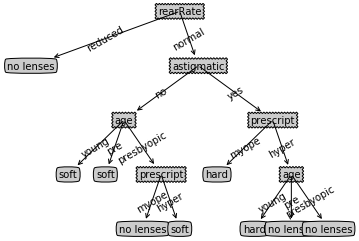

In [122]:
createPlot(lensesTree)

In [ ]:
'''
之前我们已经从数据集中成功的创建了决策树，

但是字典的形式非常的不易于理解，

因此本节采用Matplotlib库创建树形图。

首先，使用文本注解绘制树节点：

'''

In [2]:
##采用matplotlib绘制树形图
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

 #绘制树节点
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

In [3]:
'''
获得叶节点的数目和树的层数，并进行测试：
'''
##获取节点的数目和树的层数 
def getNumLeafs(myTree):
    numLeafs = 0
    #firstStr = myTree.keys()[0]
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]#找到输入的第一个元素
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 1
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]#找到输入的第一个元素
    #firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
    if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
    {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


#测试
mytree = retrieveTree(0)
print(getNumLeafs(mytree))
print(getTreeDepth(mytree))


3
2


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


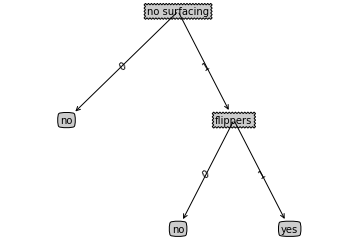

In [4]:
'''
绘制树：
'''
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  
    depth = getTreeDepth(myTree)
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]#找到输入的第一个元素
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':   
            plotTree(secondDict[key],cntrPt,str(key))        
        else:   
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()
    

#测试
mytree = retrieveTree(0)
print(mytree)
createPlot(mytree)

In [18]:
# import json

# user_info = '{"name": "john", "gender": "male", "age": 28}'
# print(json.loads(user_info))


import json
strtest = '{"code":"20171551","chinese_name":"超临界流体色谱测定塑料中塑化剂、己内酰胺等方法","english_name":"无","ns_officer_id":"18ffeb3a-4218-4b55-843d-118a24280e01","ns_officer_name":"卞志昕","report_copies":2,"science_and_technology_essential":"无","ns_essential":"无","keywords":"123","attachments":"5666","subject_code":"","wty_id":"c9b7c4b2-988b-4021-878b-c9a79af48486","status":2,"invoice_status":false,"auditor_id":"无","auditor_name":"无","status_comments":"无","invoice_amount":"无","project_time":{"start_time":{"$date":"2017-12-05T00:00:00.000Z"},"delivery_time":{"$date":"2017-11-10T00:00:00.000Z"}},"report_delivery_way":{"_type":0},"mandate_unit":{"name":"上海出入境检验检疫局动植物与食品检验检疫技术中心","address":"民生路1208号","register_origin":"无","postcode":"","email":"maming@shciq.gov.cn","principal":"","principal_fax":"无","contact_person":"无","contact_person_contact":"无","principal_contact":"","type":""},"ns_type":{"_type":0,"goals":[{"_type":1,"comments":"无"}],"range":1,"report_type":[]},"expense":{"elementary":4000.0,"urgent":2000.0,"print":0.0,"express":0.0,"others":0.0,"total":6000.0,"payment":{"_type":0}},"belong_to_department":{"id":"58cb373fdad3fd56f5294f08","name":"技术情报部"},"Invoices":{"Invoice":{"code":[""]},"Payment":{"_type":0,"date":""},"invoice_amount":0.0}}'
dicttest = json.loads(strtest)
print(dicttest)
createPlot(dicttest)
# print(strtest)

{'code': '20171551', 'chinese_name': '超临界流体色谱测定塑料中塑化剂、己内酰胺等方法', 'english_name': '无', 'ns_officer_id': '18ffeb3a-4218-4b55-843d-118a24280e01', 'ns_officer_name': '卞志昕', 'report_copies': 2, 'science_and_technology_essential': '无', 'ns_essential': '无', 'keywords': '123', 'attachments': '5666', 'subject_code': '', 'wty_id': 'c9b7c4b2-988b-4021-878b-c9a79af48486', 'status': 2, 'invoice_status': False, 'auditor_id': '无', 'auditor_name': '无', 'status_comments': '无', 'invoice_amount': '无', 'project_time': {'start_time': {'$date': '2017-12-05T00:00:00.000Z'}, 'delivery_time': {'$date': '2017-11-10T00:00:00.000Z'}}, 'report_delivery_way': {'_type': 0}, 'mandate_unit': {'name': '上海出入境检验检疫局动植物与食品检验检疫技术中心', 'address': '民生路1208号', 'register_origin': '无', 'postcode': '', 'email': 'maming@shciq.gov.cn', 'principal': '', 'principal_fax': '无', 'contact_person': '无', 'contact_person_contact': '无', 'principal_contact': '', 'type': ''}, 'ns_type': {'_type': 0, 'goals': [{'_type': 1, 'comments': '无'}], 'ran

AttributeError: 'str' object has no attribute 'keys'